The first part of the code initializes the database that you will need for the last part of the assignment. It also adds some libraries to help with handling your code. If you wish to use more libraries you can add them here. When prompted, you will get a request to allow Google SDK access your google account. Follow the link and accept with your university google account. Copy the verification link. You should see a plot of the PES of H2 if everything was successful.

In [1]:
%pip install netCDF4 
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import math

# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# link = 'https://drive.google.com/file/d/1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF/view?usp=sharing'
# id ='1AX7p4iDbbXSV9af5kXw9szzoDJ13IRcF'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('testdata.nc') 
# testdata = 'testdata.nc' 
# ds = nc.Dataset(testdata)

# for var in ds.variables.values():
#     print(var)

# yAxis = []
# xAxis = np.arange(0.25,5.05,0.05)
# for i in range(96):
#   yAxis.append(ds['energy'][i][0:])
  
# plt.ylabel("Ev")
# plt.xlabel("Bond Distance")
# plt.plot(xAxis,yAxis)
# plt.savefig('test_data.png')

     |████████████████████████████████| 4.7MB 18.8MB/s 
     |████████████████████████████████| 317kB 45.1MB/s 


In [ ]:
# test array
input_array_test = np.array([[0,0,1],[1,0,1,],[0,1,1],[1,1,1]])
output_array_test = np.array([[0],[1],[1],[0]])

In [2]:
### activation function
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def der_sigmoid(x):
    return x * (1.0 - x)

In [147]:
### neural network

class NeuralNetwork:
    def __init__(self, x, y, nodes, learn):
        self.input = x
        self.output = y
        self.node = nodes
        self.learn= learn
        self.weights1 = np.random.rand(self.input.shape[1],self.node)
        self.weights2 = np.random.rand(self.node,self.output.shape[1])
        self.output_predict = np.zeros(y.shape)
    
    def forward_feed(self):
        self.hidden_layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output_predict = sigmoid(np.dot(self.hidden_layer1, self.weights2))

    def backward_propogation(self):
        self.error = self.output -self.output_predict
        self.square_error = np.square(self.error)
        d_weights2 = np.dot(self.hidden_layer1.T, 2 * self.error * self.learn * der_sigmoid(self.output_predict))
        d_weights1 = np.dot(self.input.T, np.dot(2 * self.error * self.learn *der_sigmoid(self.output_predict), self.weights2.T)* self.learn* der_sigmoid(self.hidden_layer1))
        # update the weights
        self.weights1 += d_weights1
        self.weights2 += d_weights2

The following code checks if the database data is working and creates an input and output array based on this data. 


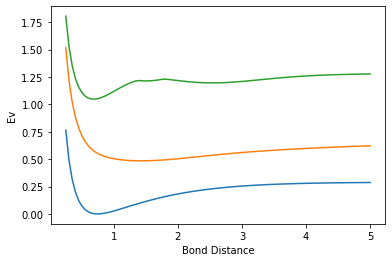

In [141]:
fn = '/content/testdata.nc'
ds = nc.Dataset(fn)

yAxis = []
xAxis = np.arange(0.25,5.05,0.05)
for i in range(96):
  yAxis.append(ds['energy'][i][0:])
  
yAxisMin= np.amin(yAxis)
yAxis = yAxis-yAxisMin
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.plot(xAxis,yAxis)
plt.savefig('test_data.png')

input_array = np.reshape(xAxis, (-1, 1))
output_array = yAxis

In [ ]:
### normalize the input data and output data
input_scaler = input_array.max()
input_norm = input_array/input_array.max()
input_norm

In [ ]:
output_scaler = output_array.max()
print(output_scaler)
output_norm = output_array/output_array.max()
output_norm
# print(output_norm.max())

# layer1, epochs 10000, nodes 14, learn 1

In [148]:
nn=NeuralNetwork(input_norm,output_norm,14,1)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6383587236367817, 0.33859306450071147, 0.27991275924743736, 0.27991252117431437, 0.27991227755858955, 0.27991202820744376, 0.2799117729190892, 0.2799115114822451, 0.2799112436755761, 0.27991096926709075, 0.27991068801349595, 0.2799103996595049, 0.27991010393709287, 0.2799098005646979, 0.2799094892463602, 0.27990916967079615, 0.27990884151039885, 0.2799085044201617, 0.2799081580365138, 0.2799078019760633, 0.2799074358342357, 0.2799070591838004, 0.27990667157327176, 0.279906272525175, 0.2799058615341602, 0.27990543806495166, 0.27990500155011394, 0.2799045513876157, 0.27990408693816987, 0.27990360752232535, 0.2799031124172844, 0.27990260085341273, 0.2799020720104094, 0.279901525013096, 0.2799009589267818, 0.279900372752152, 0.2798997654196245, 0.2798991357831059, 0.2798984826130746, 0.27989780458890334, 0.2798971002903219, 0.27989636818790725, 0.27989560663246926, 0.27989481384317977, 0.27989398789426895, 0.2798931267000844, 0.27989222799827307, 0.27989128933080726, 0.2798903080225256,

(10000,)


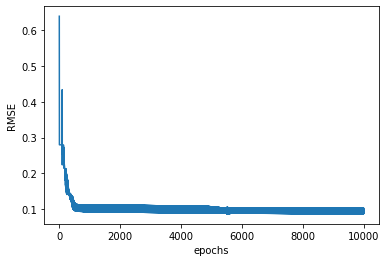

In [149]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [150]:
rmse_min_node14 = math.sqrt(min(mse))
rmse_min_node14 

0.08709023585595388

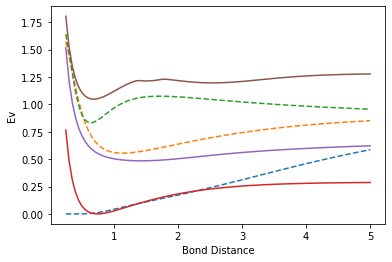

In [151]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# layer1, epochs 10000, nodes 14, learn 0.1

In [152]:
nn=NeuralNetwork(input_norm,output_norm,14,0.1)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6625016733881746, 0.646174424351922, 0.4494824805984428, 0.42725858860832383, 0.39508822537869276, 0.22209949421200204, 0.23407242174908216, 0.2585671957681308, 0.23437871974870683, 0.21123677390298393, 0.24946538133099014, 0.2100281879883221, 0.19835761271126512, 0.20949675071666551, 0.24466978034536058, 0.19817926370010924, 0.20775153256864604, 0.24104410075525134, 0.1828286894320992, 0.16636154231654776, 0.20005531062789997, 0.19860499184787697, 0.1972450845333903, 0.20058960863598843, 0.23077677998710833, 0.2579960855695977, 0.24651353301843987, 0.2108089091347911, 0.23066951744284891, 0.2512953020138056, 0.2248983487137924, 0.2099179813992316, 0.251665547183945, 0.2320609435567443, 0.1726394758939025, 0.14947010510214298, 0.21855196269783708, 0.24042737635600137, 0.19467007227731759, 0.21944254055366158, 0.25007458337303334, 0.22507372422290015, 0.18746871543589766, 0.20575668300731295, 0.08857198894032328, 0.1672351382716019, 0.23595792070377034, 0.2624333222404055, 0.25816269

(10000,)


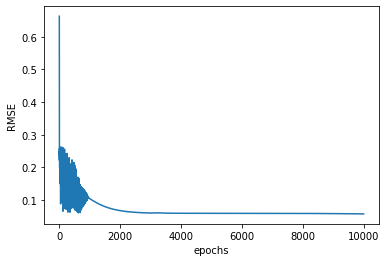

In [153]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [154]:
rmse_min_learn01 = math.sqrt(min(mse))
rmse_min_learn01

0.058050206987272604

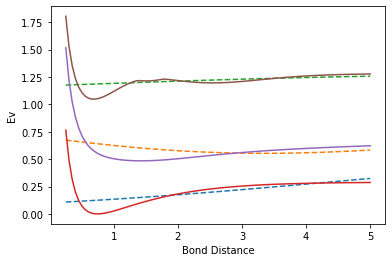

In [155]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# layer1, epochs 10000, nodes14, learn 0.01

In [156]:
nn=NeuralNetwork(input_norm,output_norm,14,0.01)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6593084659271781, 0.6583412946419527, 0.6572326376160926, 0.6559531823098245, 0.6544667703311777, 0.6527293152315496, 0.6506883067925002, 0.6482837947898271, 0.6454521331482529, 0.6421332141251954, 0.6382777484181239, 0.6338383881507182, 0.6287044315477565, 0.622515018080659, 0.6142643878162738, 0.6014735686355606, 0.5781128241279955, 0.5303829059411058, 0.45007604618423797, 0.3995516038318464, 0.38692922292404336, 0.38085660967396795, 0.37577014512916673, 0.3700396356754869, 0.3624388690577989, 0.35120864340001806, 0.3330666899558935, 0.30148032739034647, 0.24564907854316, 0.1645391471495468, 0.10058352686695995, 0.07724720733152336, 0.07058789402293689, 0.06853224575019604, 0.06780866408223361, 0.06751110638074485, 0.06736425364775168, 0.06727720705472776, 0.06721761024472037, 0.0671729169373396, 0.0671376718857981, 0.06710912641054946, 0.06708566153082612, 0.06706619241989367, 0.06704992715474523, 0.06703625832460182, 0.06702470730953859, 0.06701489130582997, 0.06700650141909027,

(10000,)


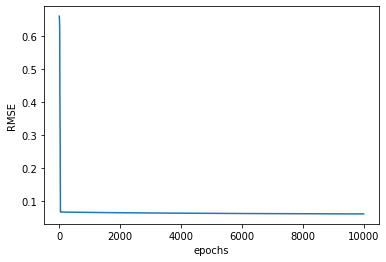

In [157]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [158]:
rmse_min_learn001 = math.sqrt(min(mse))
rmse_min_learn001

0.06131422091895629

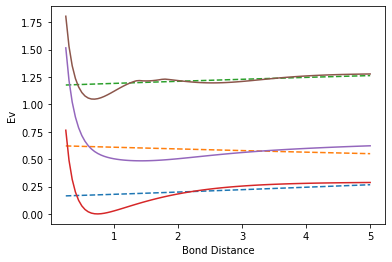

In [159]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# layer1, epochs 10000, nodes14, learn 0.001

In [160]:
nn=NeuralNetwork(input_norm,output_norm,14,0.001)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6511760715120634, 0.6508607079525164, 0.6505357640766242, 0.6502008081428867, 0.6498553829553728, 0.6494990040346974, 0.6491311576367281, 0.6487512986049747, 0.6483588480412639, 0.6479531907778091, 0.6475336726321724, 0.6470995974248528, 0.6466502237373308, 0.6461847613863502, 0.6457023675880056, 0.6452021427828704, 0.6446831260909147, 0.6441442903623793, 0.6435845367881113, 0.6430026890301809, 0.6423974868309653, 0.6417675790564095, 0.6411115161269915, 0.6404277417882426, 0.639714584171743, 0.6389702460976998, 0.638192794571962, 0.6373801494342447, 0.6365300711212011, 0.6356401475188029, 0.6347077798945581, 0.6337301679230513, 0.6327042938502072, 0.6316269058851424, 0.6304945009666947, 0.6293033071286221, 0.6280492657877623, 0.6267280144087106, 0.6253348701631937, 0.6238648154093591, 0.6223124860730413, 0.6206721643266967, 0.6189377773375203, 0.617102904296126, 0.61516079443646, 0.6131043993009034, 0.6109264230596143, 0.608619395203354, 0.6061757703036152, 0.6035880596377599, 0.600

(10000,)


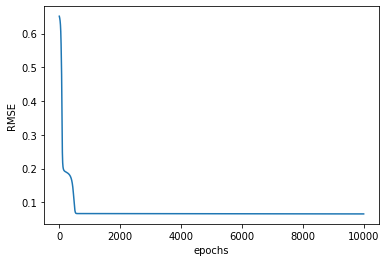

In [161]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [162]:
rmse_min_learn0001 = math.sqrt(min(mse))
rmse_min_learn0001

0.06546033531843698

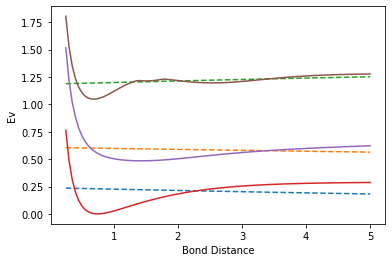

In [163]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# learn 0.2

In [167]:
nn=NeuralNetwork(input_norm,output_norm,14,0.2)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6371933467132864, 0.15162515140508234, 0.38646585677449635, 0.27202162796073653, 0.27198530844984015, 0.271947108814059, 0.27190636774080523, 0.27186183028633715, 0.2718126385316682, 0.2717577550556363, 0.27169593328669767, 0.27162555783734704, 0.27154447960859185, 0.27144975599021026, 0.27133723960270023, 0.2712008856709138, 0.27103152574413786, 0.2708145614728387, 0.27052529932599356, 0.27011860992284137, 0.2695031332927414, 0.26846584132937107, 0.26639545794915953, 0.2608505470796506, 0.23512314310113722, 0.3291409465045408, 0.27158703947575424, 0.2714601579461114, 0.2712980773458977, 0.2710837791261054, 0.27078761879801383, 0.27035347508240803, 0.26966254300165426, 0.26842042904927105, 0.26570228643839505, 0.25722174038852436, 0.2109165963155962, 0.37452298910929605, 0.27231600515983145, 0.2723098757841291, 0.2723037507536524, 0.2722975855419368, 0.27229135420692424, 0.2722850446695302, 0.27227864859095907, 0.27227215931167414, 0.27226557053007827, 0.2722588758280867, 0.27225206

(10000,)


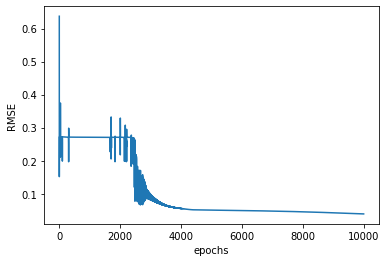

In [168]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [169]:
rmse_min_learn02 = math.sqrt(min(mse))
rmse_min_learn02

0.03886398516231648

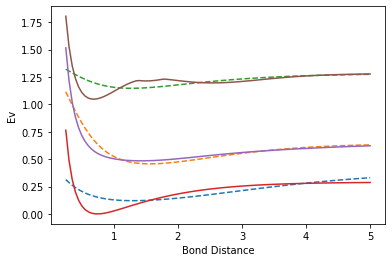

In [172]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# learn 0.5


In [173]:
nn=NeuralNetwork(input_norm,output_norm,14,0.5)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6326967487767333, 0.20905982247070132, 0.25817895429924165, 0.41718168159379093, 0.27979109665528806, 0.27978780982032386, 0.27978435987537814, 0.27978073404802717, 0.2797769181696234, 0.2797728964763667, 0.2797686513750332, 0.2797641631657663, 0.2797594097124063, 0.2797543660483304, 0.27974900390251173, 0.2797432911261996, 0.2797371909949153, 0.2797306613527926, 0.2797236535559252, 0.27971611115718825, 0.2797079682553628, 0.2796991474038715, 0.2796895569353778, 0.2796790875022685, 0.27966760755083064, 0.27965495732474, 0.2796409408084979, 0.2796253147358252, 0.27960777333719294, 0.27958792677167804, 0.27956526997739145, 0.27953913660175506, 0.27950862900190204, 0.27947250854949673, 0.27942901748045984, 0.27937557723049433, 0.2793082516850888, 0.27922073338162723, 0.2791022827493158, 0.2789331325323132, 0.27867292410847766, 0.27822640703938006, 0.2773142436418017, 0.27475920289209904, 0.26042395495759485, 0.375444624470665, 0.27964640916802663, 0.2796232788355696, 0.2795961312717607

(10000,)


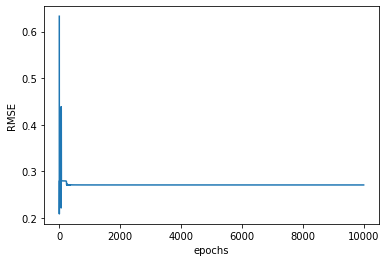

In [174]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [175]:
rmse_min_learn05 = math.sqrt(min(mse))
rmse_min_learn05

0.20905982247070132

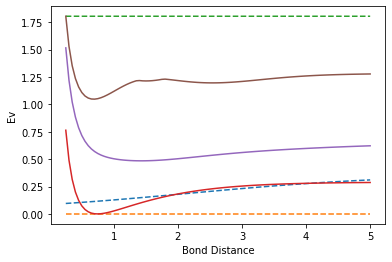

In [177]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# learn 0.25

In [178]:
nn=NeuralNetwork(input_norm,output_norm,14,0.25)
mse=[]
for i in range(10000):
    nn.forward_feed()
    nn.backward_propogation()
    mse.append(nn.square_error.mean())

rmse = [math.sqrt(i) for i in mse]
print(rmse)
# print(nn.output_predict)

[0.6462596047203294, 0.5076959863342894, 0.151693367375407, 0.3595449312459341, 0.2797644698630674, 0.27976184894087736, 0.2797591381808952, 0.2797563326627276, 0.2797534270913644, 0.27975041576044885, 0.27974729251112024, 0.27974405068579566, 0.2797406830761461, 0.27973718186439916, 0.2797335385569467, 0.27972974390905275, 0.2797257878392391, 0.27972165933165755, 0.2797173463244356, 0.2797128355815872, 0.2797081125455959, 0.2797031611671827, 0.27969796370803235, 0.27969250051133476, 0.27968674973385116, 0.27968068703177074, 0.2796742851907986, 0.2796675136885907, 0.27966033817467306, 0.27965271984913836, 0.27964461471641505, 0.27963597268385865, 0.2796267364662625, 0.27961684024586253, 0.2796062080219012, 0.27959475156275154, 0.2795823678446679, 0.2795689358210443, 0.2795543123095462, 0.2795383267039489, 0.27952077410110193, 0.27950140626252595, 0.279479919574951, 0.27945593878596975, 0.279428994688611, 0.2793984929727433, 0.2793636699065049, 0.279323527911998, 0.2792767396194885, 0.2

(10000,)


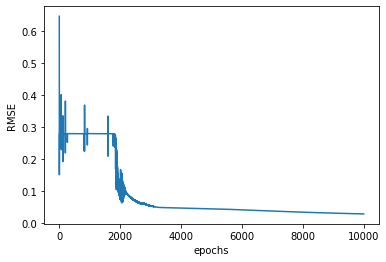

In [179]:
### PLOT RMSE VS epochs

# plt.figure(figsize=(6,4.5),dpi=120)
epochs = np.linspace(0,10000,10000)
print(epochs.shape)
plt.plot(epochs, rmse)
# plt.axhline(y=0.001, color='r', linestyle='-')
# plt.axhline(0.01, color = 'g', linestyle = '-')
plt.xlabel('epochs')
plt.ylabel("RMSE")
# plt.ylim(0,0.15)
# plt.savefig("RMES_epochs_training_set.png",dpi=120)
plt.show()

In [180]:
rmse_min_learn025 = math.sqrt(min(mse))
rmse_min_learn025

0.02929367570037519

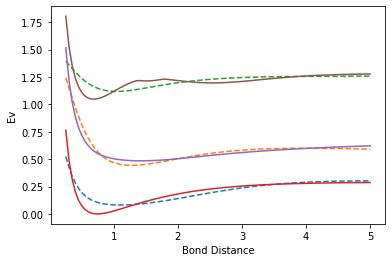

In [181]:
output_predict_node14 = nn.output_predict * output_scaler
# print(output_predict_test2)

plt.plot(input_array, output_predict_node14, '--')
plt.plot(input_array,output_array,'-')
plt.ylabel("Ev")
plt.xlabel("Bond Distance")
plt.show()

# plot RMSE_MIN vs number of nodes

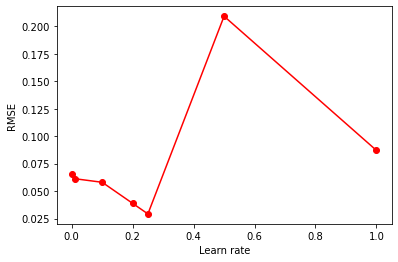

In [182]:
node_array=[1,0.5,0.25,0.2,0.1,0.01,0.001]
rmse_min_array =[rmse_min_node14,rmse_min_learn05,rmse_min_learn025,rmse_min_learn02, rmse_min_learn01, rmse_min_learn001, rmse_min_learn0001]
plt.plot(node_array, rmse_min_array,'ro-')
plt.xlabel("Learn rate")
plt.ylabel("RMSE")
plt.show()